**Machine specs:**

Intel Core i5-9400F

6 cores, 6 threads

L1 cache: 64 KB (per core)

L2 cache : 256 KB (per core)

L3 cache: 9 MB

In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
def plot_dicts(d, legend_title, title="", xlabel="", ylabel="", div=1e6, x=[]):
    plt.rcParams["figure.figsize"] = [7.5, 5]
    if x == []:
        keys = d.keys()
        for key in keys:
            plt.plot(d[key].keys(), list(map(lambda mcs: mcs / div, d[key].values())), label=key)
    else:
        keys = d.keys()
        for key in keys:
            dp = {k: d[key][k] for k in x}
            plt.plot(dp.keys(), list(map(lambda mcs: mcs / div, dp.values())), label=key)
    legend = plt.legend()
    legend.set_title(legend_title) 
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ymin=0)
    plt.show()

In [3]:
def refactor_dict(d):
    m = max(map(int, d.keys()))
    return { 'N' if int(k) == m else k: d[k] for k in d.keys() }

def refactor(d):
    return { k: refactor_dict(d[k]) for k in d.keys() }

In [4]:
out = open(r'intel.txt', 'r')
lines = out.readlines()
durations_dot_serial = json.loads(lines[0].strip())
durations_dot_parallel_outer = json.loads(lines[1].strip())
durations_dot_parallel_inner = json.loads(lines[2].strip())
durations_block_serial = refactor(json.loads(lines[3].strip()))
durations_block_parallel_outer = refactor(json.loads(lines[4].strip()))
durations_block_parallel_inner = refactor(json.loads(lines[5].strip()))
best_r_block_serial= json.loads(lines[6].strip())
best_r_block_parallel_outer= json.loads(lines[7].strip())
best_r_block_parallel_inner = json.loads(lines[8].strip())
best_time_block_serial = json.loads(lines[9].strip())
best_time_block_parallel_outer = json.loads(lines[10].strip())
best_time_block_parallel_inner = json.loads(lines[11].strip())

# Comparison of algorithms for N = 1500

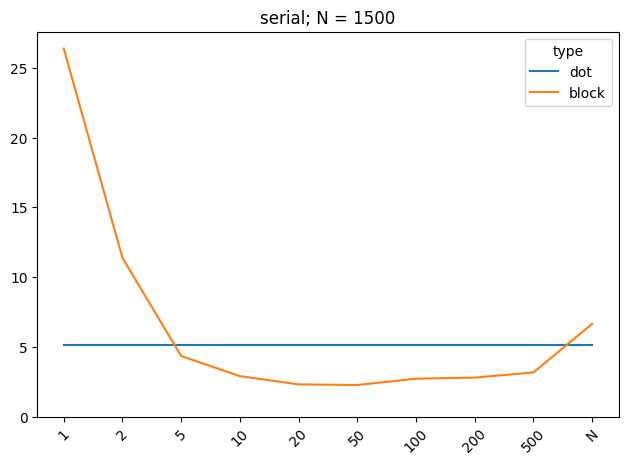

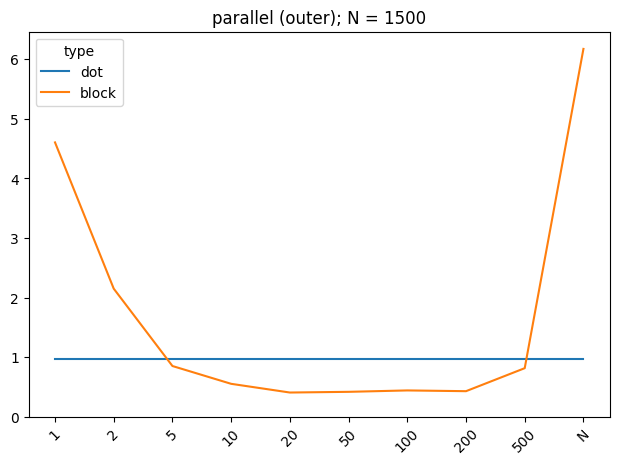

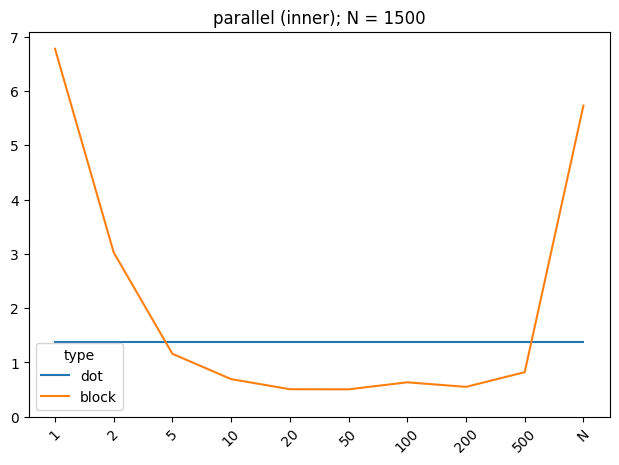

In [5]:
N = 1500

d1 = {k: durations_dot_serial[str(N)] for k in durations_block_serial[str(N)].keys()}
d2 = {k: durations_block_serial[str(N)][k] for k in durations_block_serial[str(N)].keys()}
plot_dicts({'dot': d1, 'block': d2}, 'type', title=f'serial; N = {N}')

d1 = {k: durations_dot_parallel_outer[str(N)] for k in durations_block_parallel_outer[str(N)].keys()}
d2 = {k: durations_block_parallel_outer[str(N)][k] for k in durations_block_parallel_outer[str(N)].keys()}
plot_dicts({'dot': d1, 'block': d2}, 'type', title=f'parallel (outer); N = {N}')

d1 = {k: durations_dot_parallel_inner[str(N)] for k in durations_block_parallel_inner[str(N)].keys()}
d2 = {k: durations_block_parallel_inner[str(N)][k] for k in durations_block_parallel_inner[str(N)].keys()}
plot_dicts({'dot': d1, 'block': d2}, 'type', title=f'parallel (inner); N = {N}')

## Dot algorithms for N =  100, 200, ..., 2000

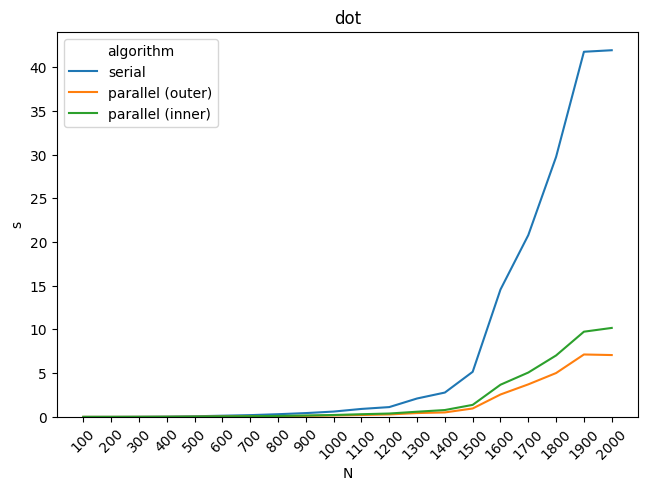

In [6]:
N = list(map(str, range(100, 2100, 100)))

durations = { 'serial': durations_dot_serial, 'parallel (outer)': durations_dot_parallel_outer, 'parallel (inner)': durations_dot_parallel_inner }
plot_dicts(durations, 'algorithm', 'dot', 'N', 's', x=N)

## Dot algorithms for N =  100, 200, 300, 400, 500

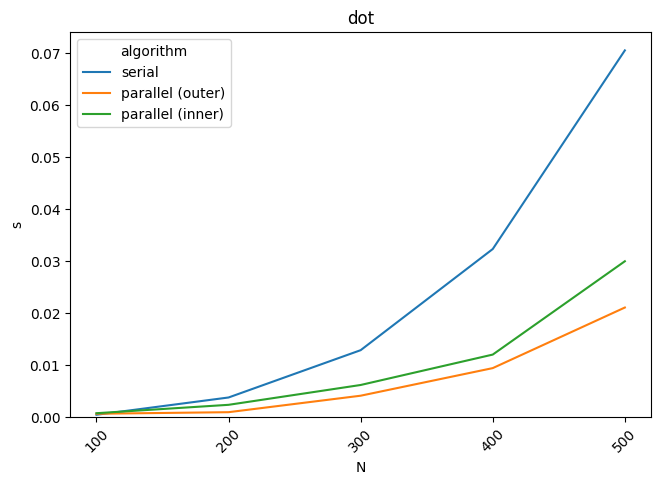

In [7]:
N = list(map(str, range(100, 600, 100)))

durations = { 'serial': durations_dot_serial, 'parallel (outer)': durations_dot_parallel_outer, 'parallel (inner)': durations_dot_parallel_inner }
plot_dicts(durations, 'algorithm', 'dot', 'N', 's', x=N)

## Dot algorithms for N =  1600, 1700, 1800, 1900, 2000

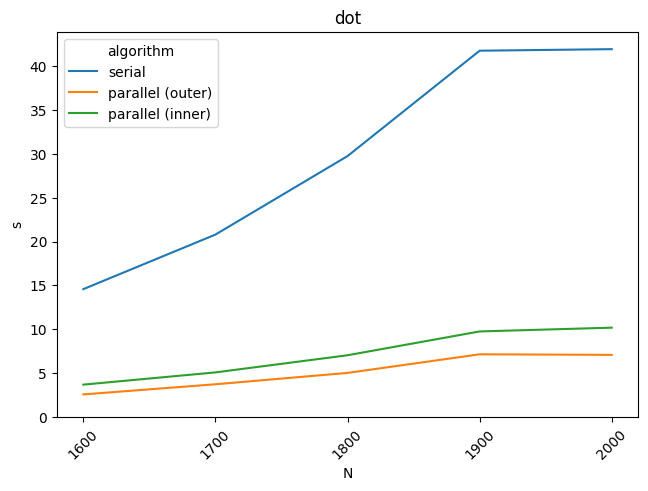

In [8]:
N = list(map(str, range(1600, 2100, 100)))

durations = { 'serial': durations_dot_serial, 'parallel (outer)': durations_dot_parallel_outer, 'parallel (inner)': durations_dot_parallel_inner }
plot_dicts(durations, 'algorithm', 'dot', 'N', 's', x=N)

## Block algorithms for N: 100, 200, 300, 400, 500

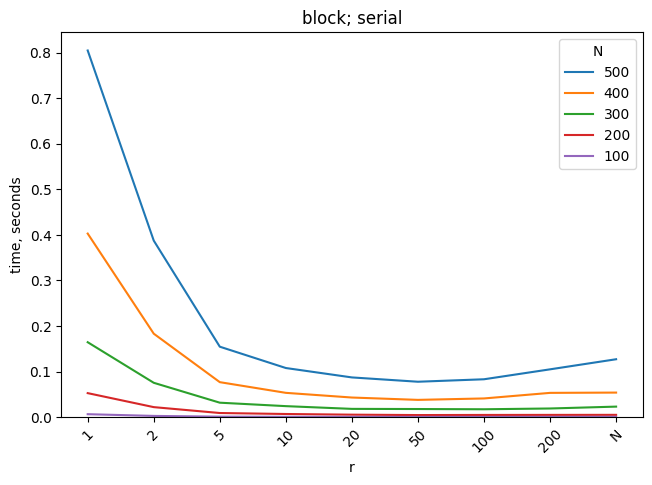

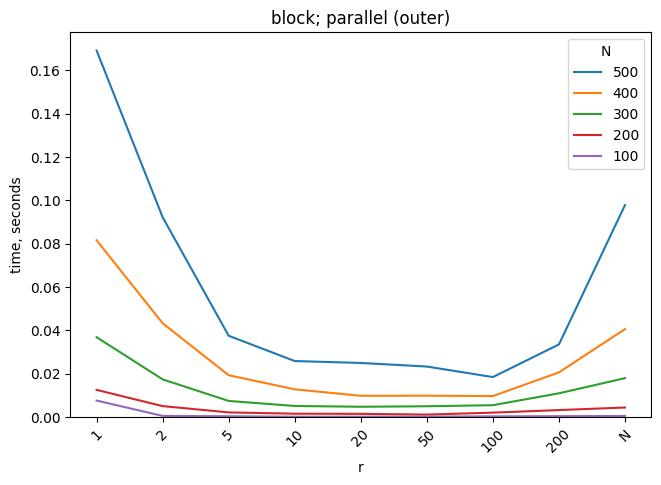

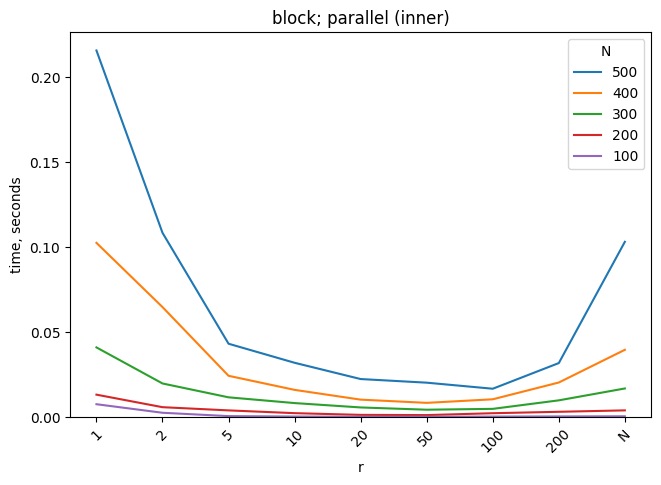

In [9]:
N = list(map(str, range(500, 0, -100)))
plot_dicts({k: durations_block_serial[k] for k in N}, 'N', 'block; serial', 'r', 'time, seconds')
plot_dicts({k: durations_block_parallel_outer[k] for k in N}, 'N', 'block; parallel (outer)', 'r', 'time, seconds')
plot_dicts({k: durations_block_parallel_inner[k] for k in N}, 'N', 'block; parallel (inner)', 'r', 'time, seconds')

## Block algorithms for N: 1600, 1700, 1800, 1900, 2000

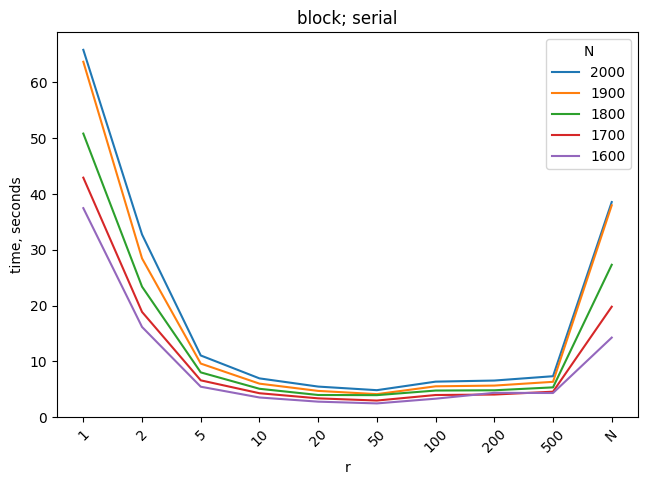

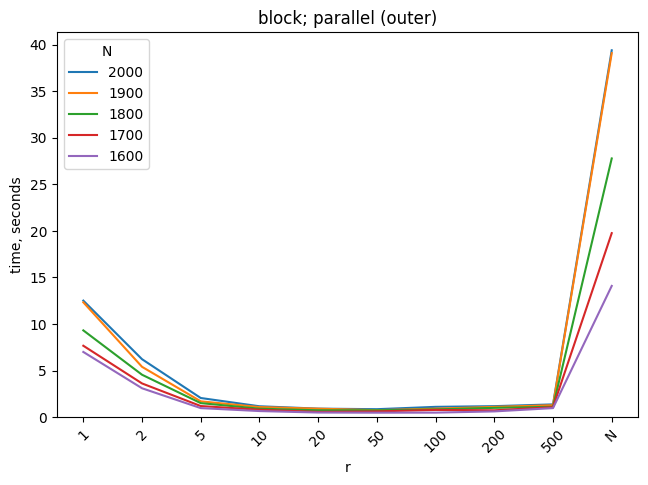

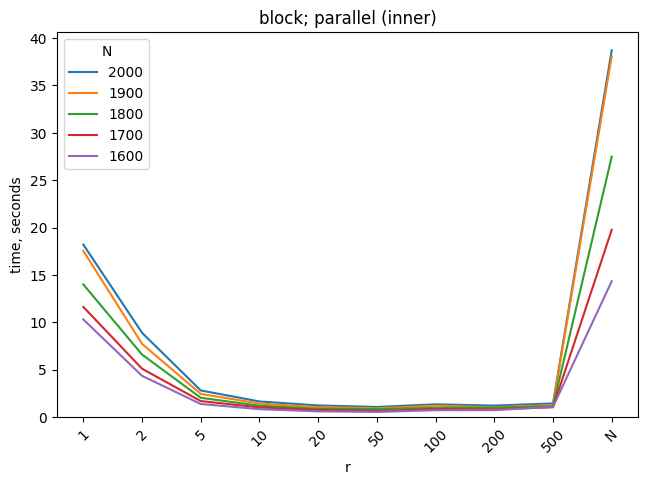

In [10]:
N = list(map(str, range(2000, 1500, -100)))
plot_dicts({k: durations_block_serial[k] for k in N}, 'N', 'block; serial', 'r', 'time, seconds')
plot_dicts({k: durations_block_parallel_outer[k] for k in N}, 'N', 'block; parallel (outer)', 'r', 'time, seconds')
plot_dicts({k: durations_block_parallel_inner[k] for k in N}, 'N', 'block; parallel (inner)', 'r', 'time, seconds')

## Best block sizes for N: 100, 200, ... 1900, 2000

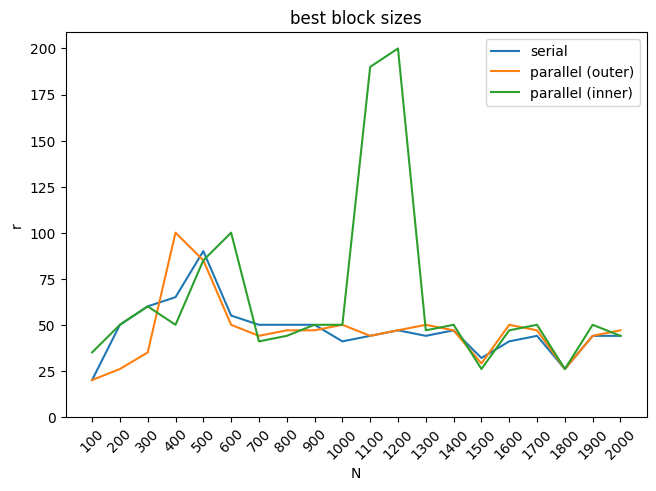

In [11]:
N = list(map(str, range(100, 2100, 100)))
best_r = { 'serial': best_r_block_serial, 'parallel (outer)': best_r_block_parallel_outer, 'parallel (inner)': best_r_block_parallel_inner }
plot_dicts(best_r, '', 'best block sizes', 'N', 'r', div=1, x=N)

## Algorithm behaviour near N = $2^{10}$

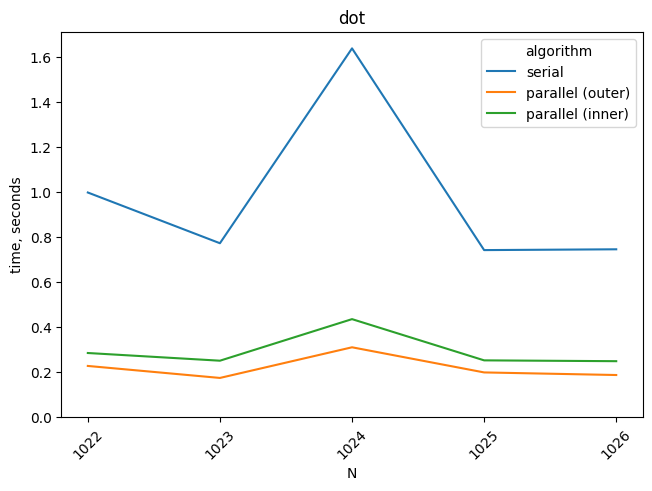

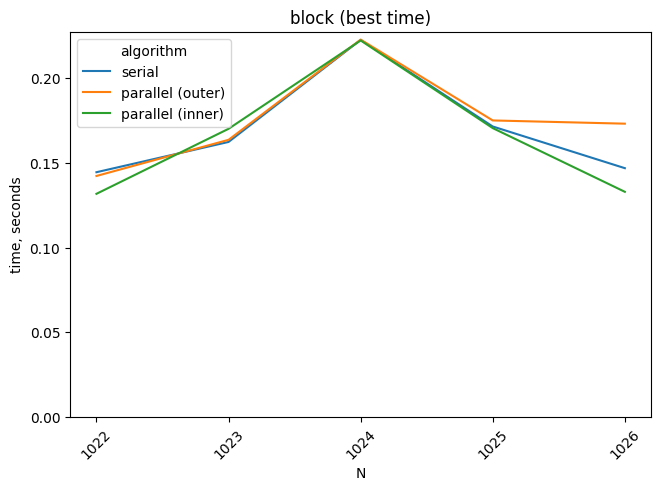

In [12]:
r = 2 ** 10
r = list(map(str, range(r - 2, r + 3)))
durations = { 'serial': durations_dot_serial, 'parallel (outer)': durations_dot_parallel_outer, 'parallel (inner)': durations_dot_parallel_inner }
plot_dicts(durations, 'algorithm', 'dot', 'N', 'time, seconds', x=r)
durations = { 'serial': best_time_block_serial, 'parallel (outer)': best_time_block_parallel_outer, 'parallel (inner)': best_time_block_parallel_inner }
plot_dicts(durations, 'algorithm', 'block (best time)', 'N', 'time, seconds', x=r)